In [231]:
import pandas as pd
import hvplot.pandas
import holoviews as hv
import numpy as np
from holoviews import opts
import panel as pn
pn.extension()
hv.extension('bokeh')
import geopandas as gpd
from shapely.geometry import Point
import folium
import branca.colormap as cm
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from jupyter_dash import JupyterDash
from dash import Dash, dcc, html
from dash.dependencies import Input, Output


In [232]:
# Define the folder path and file name
data_csv_file="data/commute/CSVLog_20240925_055028.CSV"

output_folder_path = 'output/date/analysis_20240925_am/'  # Change this to your folder path

df_file_name = "df.csv"
df_file_path = os.path.join(output_folder_path, df_file_name)
map_moving_file_path = os.path.join(output_folder_path, 'map_moving.html')
#create folder folder if it does not exist
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

In [233]:
df=pd.read_csv(data_csv_file)
df.columns = df.columns.str.strip()
df_file_path = os.path.join(output_folder_path, df_file_name)
df.to_csv(df_file_path, index=False)
#df.head()

In [234]:
column_list=df.columns.tolist()
print(column_list)

['Time (sec)', 'Instant fuel economy (MPG)', 'Intake manifold absolute pressure (inHg)', 'Engine RPM (RPM)', 'Vehicle speed (MPH)', 'Mass air flow rate (lb/min)', 'Barometric pressure (inHg)', 'Ambient air temperature (°F)', 'Relative accelerator pedal position (%)', 'Intake air temperature bank 1  sensor 1 (°F)', 'Intake air temperature bank 1  sensor 2 (°F)', 'Commanded fuel rail pressure A (inHg)', 'Fuel rail pressure A (inHg)', 'Boost (psi)', 'Acceleration (ft/s²)', 'Acceleration (Avg) (ft/s²)', 'Engine Power (hp)', 'Engine Torque (lb•ft)', 'Trip Distance (miles)', 'Trip Fuel Economy (MPG)', 'Latitude (deg)', 'Longitude (deg)', 'Altitude (ft)']


In [235]:
df=df[['Time (sec)',
       'Trip Distance (miles)', 
       'Vehicle speed (MPH)',
       'Relative accelerator pedal position (%)',
       'Acceleration (ft/s²)',
       'Acceleration (Avg) (ft/s²)',
       'Engine Power (hp)', 
       'Engine RPM (RPM)',
       'Boost (psi)',
       'Mass air flow rate (lb/min)',
       'Intake manifold absolute pressure (inHg)',
       'Commanded fuel rail pressure A (inHg)',
       'Fuel rail pressure A (inHg)',
       'Ambient air temperature (°F)',
       'Intake air temperature bank 1  sensor 1 (°F)',
       'Intake air temperature bank 1  sensor 2 (°F)',
       'Instant fuel economy (MPG)',
       'Trip Fuel Economy (MPG)',
       'Barometric pressure (inHg)',
       'Altitude (ft)',
       'Latitude (deg)',
       'Longitude (deg)']]
df.head()

,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Relative accelerator pedal position (%),Acceleration (ft/s²),Acceleration (Avg) (ft/s²),Engine Power (hp),Engine RPM (RPM),Boost (psi),Mass air flow rate (lb/min),...,Fuel rail pressure A (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Intake air temperature bank 1 sensor 2 (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Barometric pressure (inHg),Altitude (ft),Latitude (deg),Longitude (deg)
0,0.000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000
1,0.101,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000
2,0.201,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1011.90796,45.058067,-92.95462
3,0.302,0.0,0.0,0.0,7.649174e-15,2.731848e-16,29.269173,0.0,0.0,3.1752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1011.90796,45.058067,-92.95462
4,0.402,0.0,0.0,0.0,7.649174e-15,2.731848e-16,29.269173,0.0,0.0,3.1752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1011.90796,45.058067,-92.95462


In [236]:
# To avoid math errors in situations where values = 0
df['Boost (psi)'] = df['Boost (psi)'].bfill().infer_objects()
df.loc[df['Boost (psi)'] == 0, 'Boost (psi)'] = 0.01

df.head()


,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Relative accelerator pedal position (%),Acceleration (ft/s²),Acceleration (Avg) (ft/s²),Engine Power (hp),Engine RPM (RPM),Boost (psi),Mass air flow rate (lb/min),...,Fuel rail pressure A (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Intake air temperature bank 1 sensor 2 (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Barometric pressure (inHg),Altitude (ft),Latitude (deg),Longitude (deg)
0,0.000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.01,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000
1,0.101,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.01,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000
2,0.201,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.01,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1011.90796,45.058067,-92.95462
3,0.302,0.0,0.0,0.0,7.649174e-15,2.731848e-16,29.269173,0.0,0.01,3.1752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1011.90796,45.058067,-92.95462
4,0.402,0.0,0.0,0.0,7.649174e-15,2.731848e-16,29.269173,0.0,0.01,3.1752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1011.90796,45.058067,-92.95462


In [237]:
def clean_data(df):
    # Round columns 'Time (sec)', ' Engine RPM (RPM)' and 2 other columns (Number of decimals: 0)
    df = df.rename(columns={
                'Latitude (deg)': 'lat',
                'Longitude (deg)': 'long',
                'Engine RPM (RPM)': 'RPM',
                'Trip Fuel Economy (MPG)': 'mpgTrip',
                'Relative accelerator pedal position (%)': 'relAccPedPOS (%)',
                'Instant fuel economy (MPG)': 'mpgInstant',
                'Intake manifold absolute pressure (inHg)': 'inManAbsPress (inHg)',
                'Fuel rail pressure A (inHg)': 'fuelRailPressA (inHg)',
                'Commanded fuel rail pressure A (inHg)': 'fuelRailPressA CMD (inHg)',
                'Vehicle speed (MPH)': 'MPH',
                'Acceleration (ft/s²)': 'accel (ft/s²)',
                'Acceleration (Avg) (ft/s²)': 'accelAvg (ft/s²)',
                'Mass air flow rate (lb/min)': 'massAirFlowRate (lb/min)',
                'Ambient air temperature (°F)':'tempAmbAir (°F)',
                'Intake air temperature bank 1  sensor 1 (°F)': 'tempInBnk1Sens1 (°F)',
                'Intake air temperature bank 1  sensor 2 (°F)': 'tempInBnk1Sens2 (°F)',
                'Barometric pressure (inHg)':'barPress (inHg)',
                'Trip Distance (miles)':'distTrip (Miles)',
                'Altitude (ft)':'alt (ft)',
                'Engine Power (hp)':'HP'
                })
    df = df.round({
                'RPM': 0,
                'Engine Power (hp)': 0,
                'fuelRailPressA CMD (inHg)':0,
                'fuelRailPressA (inHg)':0,
                'Altitude (ft)':0,
                'mpgInstant': 1,
                'MPH': 1,
                'relAccPedPOS (%)': 1,
                'mpgTrip': 1,
                'Boost (psi)':1,
                'inManAbsPress (inHg)': 2,
                'massAirFlowRate (lb/min)': 2,
                'Bearing (deg)': 2,
                'accel (ft/s²)': 2,
                'accelAvg (ft/s²)': 2,
                'Time (sec)': 2,
                'distTrip (Miles)': 2,
                'barPress (inHg)':1,
                'alt (ft)':1,
                'HP':1
                })
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,Time (sec),distTrip (Miles),MPH,relAccPedPOS (%),accel (ft/s²),accelAvg (ft/s²),HP,RPM,Boost (psi),massAirFlowRate (lb/min),...,fuelRailPressA (inHg),tempAmbAir (°F),tempInBnk1Sens1 (°F),tempInBnk1Sens2 (°F),mpgInstant,mpgTrip,barPress (inHg),alt (ft),lat,long
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000
1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000
2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1011.9,45.058067,-92.95462
3,0.3,0.0,0.0,0.0,0.0,0.0,29.3,0.0,0.0,3.18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1011.9,45.058067,-92.95462
4,0.4,0.0,0.0,0.0,0.0,0.0,29.3,0.0,0.0,3.18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1011.9,45.058067,-92.95462


In [238]:
df_clean.columns

Index(['Time (sec)', 'distTrip (Miles)', 'MPH', 'relAccPedPOS (%)',
       'accel (ft/s²)', 'accelAvg (ft/s²)', 'HP', 'RPM', 'Boost (psi)',
       'massAirFlowRate (lb/min)', 'inManAbsPress (inHg)',
       'fuelRailPressA CMD (inHg)', 'fuelRailPressA (inHg)', 'tempAmbAir (°F)',
       'tempInBnk1Sens1 (°F)', 'tempInBnk1Sens2 (°F)', 'mpgInstant', 'mpgTrip',
       'barPress (inHg)', 'alt (ft)', 'lat', 'long'],
      dtype='object')

In [239]:
#create dataframe where vehicle is stationary
df_stationary = df_clean[df_clean['MPH'] == 0]

In [240]:
# Shift the 'Vehicle speed (MPH)' column
df_clean['next_mph'] = df_clean['MPH'].shift(-1)

# Create the mask
mask = (df_clean['MPH'] > 0) | ((df_clean['MPH'] == 0) & (df_clean['next_mph'] > 0))
mask = mask & df_clean['next_mph'].notna()
# Filter the DataFrame and drop the 'next_mph' column
df_moving = df_clean[mask].drop(columns=['next_mph'])


In [241]:
mask = (df_moving['MPH'] <= 10)
df_less_10 = df_moving.copy()  # Correctly call the copy method
df_less_10 = df_less_10[mask]   # Now you can subscript it
df_less_10.head() # Display the first few rows
df_less_10.describe()


,Time (sec),distTrip (Miles),MPH,relAccPedPOS (%),accel (ft/s²),accelAvg (ft/s²),HP,RPM,Boost (psi),massAirFlowRate (lb/min),...,fuelRailPressA (inHg),tempAmbAir (°F),tempInBnk1Sens1 (°F),tempInBnk1Sens2 (°F),mpgInstant,mpgTrip,barPress (inHg),alt (ft),lat,long
count,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,...,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000
mean,1224.753041,18.305893,4.302665,2.191066,-0.124545,-0.670737,10.094044,1092.094044,-8.122571,1.106536,...,1531.926332,56.505956,63.593103,78.176489,8.999060,17.835580,29.356583,901.577116,44.954062,-93.163627
std,1044.237413,16.889904,2.845152,4.158640,3.441619,2.668623,10.493422,396.683694,2.926959,1.155336,...,1060.243719,1.662117,2.432992,11.144531,8.596076,10.404589,0.149973,75.863622,0.096554,0.188793
min,46.600000,0.000000,0.000000,0.000000,-7.690000,-5.910000,3.500000,590.000000,-11.700000,0.380000,...,726.000000,55.400000,60.800000,64.400000,0.000000,0.000000,29.200000,825.800000,44.860493,-93.347770
25%,117.825000,0.350000,1.900000,0.000000,-2.530000,-2.535000,4.400000,840.000000,-9.900000,0.460000,...,806.000000,55.400000,60.800000,66.200000,3.300000,9.200000,29.200000,828.225000,44.860700,-93.342224
50%,2145.980000,34.110000,3.700000,0.000000,0.000000,-0.475000,5.900000,968.000000,-8.700000,0.650000,...,1113.000000,55.400000,64.400000,86.000000,5.750000,27.000000,29.500000,839.000000,44.864082,-93.342135
75%,2247.105000,34.610000,6.800000,2.000000,2.510000,1.430000,8.700000,1211.500000,-7.800000,0.960000,...,1639.000000,59.000000,66.200000,89.600000,11.900000,27.000000,29.500000,976.800000,45.056377,-92.960556
max,2270.630000,34.620000,9.900000,15.700000,10.210000,7.970000,67.200000,2404.000000,1.600000,7.390000,...,4571.000000,59.000000,68.000000,91.400000,38.100000,27.100000,29.500000,1003.900000,45.058130,-92.954636


In [242]:
hvexplorer = df_less_10.hvplot.explorer()
hvexplorer

BokehModel(combine_events=True, render_bundle={'docs_json': {'f1fa6803-ea3d-4b3e-91c2-cc0745ac765e': {'version…

In [243]:
#creates dataframe where vehicle is moving and speed is between 10 and 20mph
mask = (df_moving['MPH'] >= 10) & (df_moving['MPH'] <= 20)
df_10_20 = df_moving.copy()
df_10_20 = df_10_20[mask]   # Now you can subscript it
df_10_20.head()  # Display the first few rows

,Time (sec),distTrip (Miles),MPH,relAccPedPOS (%),accel (ft/s²),accelAvg (ft/s²),HP,RPM,Boost (psi),massAirFlowRate (lb/min),...,fuelRailPressA (inHg),tempAmbAir (°F),tempInBnk1Sens1 (°F),tempInBnk1Sens2 (°F),mpgInstant,mpgTrip,barPress (inHg),alt (ft),lat,long
560,56.0,0.01,10.6,9.4,7.20,7.53,43.0,2336.0,-1.7,4.74,...,4368.0,59.0,62.6,66.2,3.4,0.7,29.2,977.1,45.058117,-92.95482
561,56.1,0.01,10.6,9.4,7.20,7.53,43.0,2336.0,-1.7,4.74,...,4368.0,59.0,62.6,66.2,3.4,0.7,29.2,977.1,45.058117,-92.95482
562,56.2,0.01,11.2,9.4,4.59,7.52,42.8,2398.0,-2.3,4.71,...,4509.0,59.0,62.6,66.2,3.6,0.7,29.2,977.1,45.058117,-92.95482
563,56.3,0.01,11.2,9.4,4.59,7.52,42.8,2398.0,-2.3,4.71,...,4509.0,59.0,62.6,66.2,3.6,0.7,29.2,977.1,45.058117,-92.95482
564,56.4,0.01,12.4,9.4,7.84,8.08,43.0,2490.0,-2.2,4.74,...,4329.0,59.0,62.6,66.2,4.0,0.8,29.2,977.1,45.058117,-92.95482


In [244]:
hvexplorer = df_10_20.hvplot.explorer()
hvexplorer

BokehModel(combine_events=True, render_bundle={'docs_json': {'911c8068-0232-4ca9-8c56-38b934f1dd54': {'version…

In [245]:
#creates dataframe where vehicle is moving and speed is between 20 and 30mph
mask = (df_moving['MPH'] >= 20) & (df_moving['MPH'] <= 30)
df_20_30 = df_moving.copy()
df_20_30 = df_20_30[mask]   # Now you can subscript it
df_20_30.head()  # Display the first few rows

,Time (sec),distTrip (Miles),MPH,relAccPedPOS (%),accel (ft/s²),accelAvg (ft/s²),HP,RPM,Boost (psi),massAirFlowRate (lb/min),...,fuelRailPressA (inHg),tempAmbAir (°F),tempInBnk1Sens1 (°F),tempInBnk1Sens2 (°F),mpgInstant,mpgTrip,barPress (inHg),alt (ft),lat,long
591,59.1,0.02,20.5,7.8,2.53,3.47,35.0,2239.0,-3.5,3.84,...,3966.0,59.0,62.6,66.2,8.0,1.4,29.2,976.4,45.05797,-92.954834
592,59.2,0.02,20.5,7.8,2.53,3.47,35.0,2239.0,-3.5,3.84,...,3966.0,59.0,62.6,66.2,8.0,1.4,29.2,976.2,45.05788,-92.954834
593,59.3,0.03,20.5,7.5,2.53,3.47,33.9,2216.0,-3.3,3.71,...,4013.0,59.0,62.6,66.2,8.3,1.5,29.2,976.2,45.05788,-92.954834
594,59.4,0.03,20.5,7.5,2.53,3.47,33.9,2216.0,-3.3,3.71,...,4013.0,59.0,62.6,66.2,8.3,1.5,29.2,976.2,45.05788,-92.954834
595,59.5,0.03,21.1,6.3,2.57,3.47,33.3,2200.0,-3.5,3.64,...,3848.0,59.0,60.8,64.4,8.7,1.5,29.2,976.2,45.05788,-92.954834


In [246]:
hvexplorer = df_20_30.hvplot.explorer()
hvexplorer


BokehModel(combine_events=True, render_bundle={'docs_json': {'4386749e-e98a-4dac-9089-3b65608d4210': {'version…

In [247]:
mask = (df_moving['MPH'] >= 30) & (df_moving['MPH'] <= 40)
df_30_40 = df_moving.copy()
df_30_40 = df_30_40[mask]   # Now you can subscript it
df_30_40.head()  # Display the first few rows

,Time (sec),distTrip (Miles),MPH,relAccPedPOS (%),accel (ft/s²),accelAvg (ft/s²),HP,RPM,Boost (psi),massAirFlowRate (lb/min),...,fuelRailPressA (inHg),tempAmbAir (°F),tempInBnk1Sens1 (°F),tempInBnk1Sens2 (°F),mpgInstant,mpgTrip,barPress (inHg),alt (ft),lat,long
1255,125.50,0.38,31.1,46.7,12.53,7.36,236.1,3918.0,14.1,21.25,...,3975.0,59.0,59.0,62.6,1.8,8.1,29.2,944.7,45.056267,-92.96109
1256,125.60,0.38,31.1,46.7,12.53,7.36,236.1,3918.0,14.1,21.25,...,3975.0,59.0,59.0,62.6,1.8,8.1,29.2,944.7,45.056267,-92.96109
1257,125.70,0.38,32.3,47.1,10.18,7.86,230.5,4032.0,16.1,21.17,...,4300.0,59.0,59.0,62.6,1.9,8.0,29.2,944.7,45.056267,-92.96109
1258,125.81,0.38,32.3,47.1,10.18,7.86,230.5,4032.0,16.1,21.17,...,4300.0,59.0,59.0,62.6,1.9,8.0,29.2,944.7,45.056267,-92.96109
1259,125.91,0.38,33.6,47.8,10.02,8.35,225.4,4072.0,14.6,20.69,...,4542.0,59.0,59.0,62.6,2.0,7.9,29.2,944.7,45.056267,-92.96109


In [248]:
hvexplorer = df_30_40.hvplot.explorer()
hvexplorer

BokehModel(combine_events=True, render_bundle={'docs_json': {'57ba9ef4-7498-4947-a391-3c661133f5f9': {'version…

In [249]:
#creates dataframe where vehicle is moving and speed is between 40 and 50mph
mask = (df_moving['MPH'] >= 40) & (df_moving['MPH'] <= 50)
df_40_50 = df_moving.copy()
df_40_50 = df_40_50[mask]   # Now you can subscript it
df_40_50.describe()  # Display the first few rows

,Time (sec),distTrip (Miles),MPH,relAccPedPOS (%),accel (ft/s²),accelAvg (ft/s²),HP,RPM,Boost (psi),massAirFlowRate (lb/min),...,fuelRailPressA (inHg),tempAmbAir (°F),tempInBnk1Sens1 (°F),tempInBnk1Sens2 (°F),mpgInstant,mpgTrip,barPress (inHg),alt (ft),lat,long
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,...,1095.000000,1.095000e+03,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,339.655753,3.689516,44.410137,6.428128,0.031489,0.096402,34.127123,2269.759817,-4.584932,3.634292,...,2860.214612,5.540000e+01,58.735342,66.403836,36.747123,12.575890,29.223562,964.331781,45.036029,-93.002267
std,518.051304,8.794674,1.628538,7.458645,2.236804,1.924561,37.683547,634.152566,5.312773,3.706804,...,1332.041699,1.421735e-14,1.391007,6.693954,32.104608,4.642383,0.080742,51.230033,0.049771,0.101949
min,126.810000,0.390000,40.400000,0.000000,-5.070000,-3.040000,5.100000,1219.000000,-11.900000,0.560000,...,475.000000,5.540000e+01,57.200000,60.800000,2.500000,7.000000,29.200000,832.800000,44.865550,-93.350970
25%,155.760000,0.760000,43.500000,0.000000,0.000000,-0.510000,13.250000,1840.000000,-8.700000,1.450000,...,1474.000000,5.540000e+01,57.200000,62.600000,15.700000,10.500000,29.200000,935.500000,45.050290,-92.979900
50%,183.100000,1.100000,44.100000,6.700000,0.000000,0.000000,27.200000,2134.000000,-4.500000,2.930000,...,3177.000000,5.540000e+01,59.000000,64.400000,22.300000,11.400000,29.200000,967.200000,45.050373,-92.972920
75%,210.450000,1.430000,44.700000,8.600000,0.000000,0.370000,38.600000,2331.000000,-2.000000,4.160000,...,4031.000000,5.540000e+01,59.000000,66.200000,44.600000,12.850000,29.200000,1005.200000,45.052715,-92.967010
max,2108.330000,33.800000,49.700000,47.800000,11.500000,10.910000,237.200000,4560.000000,17.100000,24.140000,...,4855.000000,5.540000e+01,62.600000,87.800000,116.200000,27.200000,29.500000,1039.100000,45.056183,-92.961235


In [250]:
hvexplorer = df_40_50.hvplot.explorer()
hvexplorer

BokehModel(combine_events=True, render_bundle={'docs_json': {'34ce5a87-b899-437a-8b3a-28c5f595d9d8': {'version…

In [251]:
mask = (df_moving['MPH'] >= 50) & (df_moving['MPH'] <= 60)
df_50_60 = df_moving.copy()
df_50_60 = df_50_60[mask]   # Now you can subscript it
df_50_60.describe()
#df_50_60.head()  # Display the first few rows

,Time (sec),distTrip (Miles),MPH,relAccPedPOS (%),accel (ft/s²),accelAvg (ft/s²),HP,RPM,Boost (psi),massAirFlowRate (lb/min),...,fuelRailPressA (inHg),tempAmbAir (°F),tempInBnk1Sens1 (°F),tempInBnk1Sens2 (°F),mpgInstant,mpgTrip,barPress (inHg),alt (ft),lat,long
count,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,...,880.000000,8.800000e+02,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,1198.345898,17.637875,58.214091,6.446250,-0.194989,-0.140705,32.128864,2171.596591,-4.946818,3.424602,...,2187.603409,5.540000e+01,64.031818,77.061364,53.729773,24.255909,29.373523,895.443523,45.032819,-93.238918
std,441.324680,7.783682,2.188138,6.392306,1.971411,1.722473,32.939950,391.181452,6.084596,3.410764,...,1043.491184,1.421894e-14,1.852658,4.554237,42.166564,3.151797,0.148228,42.424202,0.063998,0.095140
min,128.500000,0.420000,50.300000,0.000000,-2.690000,-2.580000,6.100000,1834.000000,-11.700000,0.670000,...,682.000000,5.540000e+01,57.200000,69.800000,3.300000,6.900000,29.200000,836.600000,44.867176,-93.350430
25%,915.185000,12.560000,57.800000,0.000000,-2.142500,-1.010000,8.300000,2045.500000,-10.925000,0.907500,...,1249.000000,5.540000e+01,64.400000,73.400000,18.100000,23.700000,29.200000,862.300000,45.034966,-93.303700
50%,1166.570000,17.020000,59.000000,6.300000,0.000000,-0.500000,22.300000,2084.000000,-5.900000,2.420000,...,1928.000000,5.540000e+01,64.400000,77.000000,36.500000,25.200000,29.500000,906.800000,45.066944,-93.265340
75%,1291.545000,19.220000,59.700000,11.000000,0.000000,0.080000,44.500000,2146.000000,-0.400000,4.680000,...,3130.000000,5.540000e+01,64.400000,78.800000,96.925000,25.400000,29.500000,919.300000,45.068870,-93.174202
max,2099.730000,33.690000,59.700000,27.500000,10.050000,9.250000,226.600000,4531.000000,11.900000,20.140000,...,4598.000000,5.540000e+01,66.200000,89.600000,134.900000,27.100000,29.500000,1031.000000,45.069996,-92.961630


In [253]:
df_50_60.columns

Index(['Time (sec)', 'distTrip (Miles)', 'MPH', 'relAccPedPOS (%)',
       'accel (ft/s²)', 'accelAvg (ft/s²)', 'HP', 'RPM', 'Boost (psi)',
       'massAirFlowRate (lb/min)', 'inManAbsPress (inHg)',
       'fuelRailPressA CMD (inHg)', 'fuelRailPressA (inHg)', 'tempAmbAir (°F)',
       'tempInBnk1Sens1 (°F)', 'tempInBnk1Sens2 (°F)', 'mpgInstant', 'mpgTrip',
       'barPress (inHg)', 'alt (ft)', 'lat', 'long'],
      dtype='object')

In [255]:


# Reshape the DataFrame using pd.melt() to convert it to long format
df_melted = df_50_60.melt(id_vars=['Time (sec)'], value_vars=['relAccPedPOS (%)', 'Boost (psi)','massAirFlowRate (lb/min)','inManAbsPress (inHg)'], 
                            var_name='Measurement', value_name='Value')

# Initialize Dash app
app = Dash(__name__)

# Layout
app.layout = html.Div([
    dcc.Graph(id='interactive-plot'),
    dcc.RangeSlider(
        id='x-range-slider',
        min=df_less_10['Time (sec)'].min(),
        max=df_less_10['Time (sec)'].max(),
        value=[df_less_10['Time (sec)'].min(), df_50_60['Time (sec)'].max()],
        marks={i: str(i) for i in range(0, int(df_50_60['Time (sec)'].max()) + 1, 10)},
        step=1
    )
])

# Callback to update the graph
@app.callback(
    Output('interactive-plot', 'figure'),
    Input('x-range-slider', 'value')
)
def update_graph(selected_range):
    # Filter the melted DataFrame based on the selected time range
    filtered_df = df_melted[(df_melted['Time (sec)'] >= selected_range[0]) & (df_melted['Time (sec)'] <= selected_range[1])]
    
    # Use px.line to create the line plot
    fig = px.line(filtered_df, x='Time (sec)', y='Value', color='Measurement', 
                   labels={'Value': 'Value', 'Measurement': 'Measurement'})
    
    # Add a moving average for each measurement
    for measurement in filtered_df['Measurement'].unique():
        # Filter data for the current measurement
        measurement_df = filtered_df[filtered_df['Measurement'] == measurement]
        
        # Calculate moving average
        measurement_df['Moving Average'] = measurement_df['Value'].rolling(window=5).mean()  # Change window size as needed
        
        # Add moving average line to the figure
        fig.add_scatter(x=measurement_df['Time (sec)'], y=measurement_df['Moving Average'],
                         mode='lines', name=f'{measurement} Moving Average', line=dict(dash='dash'))

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


C:\Users\767144\AppData\Local\Temp\1\ipykernel_25092\2972686483.py:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\767144\AppData\Local\Temp\1\ipykernel_25092\2972686483.py:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\767144\AppData\Local\Temp\1\ipykernel_25092\2972686483.py:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [212]:
hvexplorer = df_50_60.hvplot.explorer()
hvexplorer

BokehModel(combine_events=True, render_bundle={'docs_json': {'353bb4a9-e007-4983-b4a3-8e0852c24bdc': {'version…

In [213]:
#creates dataframe where vehicle is moving and speed is between 40 and 50mph
mask = (df_moving['MPH'] >= 60) & (df_moving['MPH'] <= 70)
df_60_70 = df_moving.copy()
df_60_70 = df_60_70[mask]   # Now you can subscript it
df_60_70.head()  # Display the first few rows
df_60_70.describe()

,Time (sec),distTrip (Miles),MPH,relAccPedPOS (%),accel (ft/s²),accelAvg (ft/s²),HP,RPM,Boost (psi),massAirFlowRate (lb/min),...,fuelRailPressA (inHg),tempAmbAir (°F),tempInBnk1Sens1 (°F),tempInBnk1Sens2 (°F),mpgInstant,mpgTrip,barPress (inHg),alt (ft),lat,long
count,16369.000000,16369.000000,16369.000000,16369.000000,16369.000000,16369.000000,16369.000000,16369.000000,16369.000000,16369.000000,...,16369.000000,1.636900e+04,16369.000000,16369.000000,16369.000000,16369.000000,16369.000000,16369.000000,16369.000000,16369.000000
mean,1230.912500,18.190660,64.394447,5.841945,0.007030,0.013713,29.725842,2223.630643,-4.572717,3.224952,...,2192.750809,5.540000e+01,62.985534,75.439941,48.439269,23.986071,29.367603,910.680488,45.014323,-93.238400
std,505.089059,8.987818,1.989630,5.122087,1.370872,0.685966,21.193094,162.755903,4.922772,2.277910,...,994.316425,7.105644e-15,2.071452,5.211200,34.346559,2.949658,0.148968,39.796807,0.058206,0.120344
min,365.610000,2.790000,60.300000,0.000000,-5.120000,-3.560000,6.100000,1853.000000,-12.000000,0.670000,...,452.000000,5.540000e+01,57.200000,62.600000,3.700000,14.300000,29.200000,838.300000,44.869200,-93.350890
25%,788.610000,10.350000,62.800000,0.000000,0.000000,-0.500000,13.100000,2165.000000,-8.700000,1.430000,...,1223.000000,5.540000e+01,62.600000,71.600000,21.700000,22.500000,29.200000,881.200000,44.978830,-93.348946
50%,1235.520000,18.250000,64.600000,6.300000,0.000000,0.000000,24.400000,2198.000000,-4.900000,2.660000,...,2141.000000,5.540000e+01,62.600000,75.200000,36.000000,25.200000,29.500000,907.300000,45.037470,-93.290794
75%,1662.830000,25.890000,65.900000,9.400000,0.000000,0.490000,40.700000,2236.000000,-1.000000,4.430000,...,3053.000000,5.540000e+01,64.400000,78.800000,67.200000,26.200000,29.500000,931.000000,45.060350,-93.132230
max,2090.530000,33.550000,69.600000,47.800000,7.310000,7.650000,231.300000,4896.000000,17.100000,23.620000,...,4843.000000,5.540000e+01,68.000000,93.200000,135.700000,27.000000,29.500000,1028.900000,45.070050,-92.986740


In [214]:
hvexplorer = df_60_70.hvplot.explorer()
hvexplorer

BokehModel(combine_events=True, render_bundle={'docs_json': {'708545fa-4201-42be-b8dc-00a0bf63518e': {'version…

In [215]:
mask = (df_moving['MPH'] >= 70)
df_grt_70 = df_moving.copy()
df_grt_70 = df_grt_70[mask]   # Now you can subscript it
df_grt_70.head()  # Display the first few rows
df_grt_70.describe()

,Time (sec),distTrip (Miles),MPH,relAccPedPOS (%),accel (ft/s²),accelAvg (ft/s²),HP,RPM,Boost (psi),massAirFlowRate (lb/min),...,fuelRailPressA (inHg),tempAmbAir (°F),tempInBnk1Sens1 (°F),tempInBnk1Sens2 (°F),mpgInstant,mpgTrip,barPress (inHg),alt (ft),lat,long
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,1.300000e+02,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,1410.194846,21.401846,70.420769,7.312308,0.270385,0.576769,47.121538,2616.369231,-1.722308,5.054846,...,2782.284615,5.540000e+01,64.441538,73.400000,38.393846,24.724615,29.458462,915.032308,44.988319,-93.270917
std,479.008419,8.494714,0.345894,5.567375,1.690191,1.281848,30.595602,605.823907,5.877658,3.297434,...,1048.772167,7.132915e-15,1.390041,3.089367,34.638115,2.216466,0.104016,15.014371,0.036261,0.111706
min,665.810000,8.200000,70.200000,0.000000,-2.660000,-1.030000,7.700000,2236.000000,-11.600000,0.850000,...,794.000000,5.540000e+01,62.600000,68.000000,6.300000,21.200000,29.200000,901.700000,44.963240,-93.344170
25%,671.235000,8.310000,70.200000,0.000000,0.000000,0.000000,17.400000,2338.000000,-5.800000,1.902500,...,2091.000000,5.540000e+01,62.600000,69.800000,13.800000,21.300000,29.500000,906.400000,44.964077,-93.343890
50%,1723.580000,26.960000,70.200000,9.200000,0.000000,0.450000,47.400000,2396.000000,-1.200000,4.830000,...,3042.000000,5.540000e+01,64.400000,75.200000,20.400000,26.100000,29.500000,910.200000,44.964912,-93.343605
75%,1726.805000,27.020000,70.800000,12.200000,0.000000,0.510000,69.700000,2485.750000,2.900000,7.565000,...,3621.750000,5.540000e+01,66.200000,75.200000,55.500000,26.200000,29.500000,921.275000,45.039980,-93.097370
max,1730.030000,27.080000,71.500000,15.700000,5.090000,4.990000,153.100000,4900.000000,9.900000,16.810000,...,4291.000000,5.540000e+01,66.200000,77.000000,124.400000,26.200000,29.500000,995.700000,45.066578,-93.095170


In [216]:
hvexplorer = df_grt_70.hvplot.explorer()
hvexplorer

BokehModel(combine_events=True, render_bundle={'docs_json': {'a74de225-5010-446a-9859-5c22ecc9d065': {'version…

In [217]:
#creates dataframe where vehicle is moving and speed is between 40 and 50mph
mask = (df_moving['MPH'] >= 55) & (df_moving['MPH'] <= 75)
df_55_75 = df_moving.copy()
df_55_75 = df_55_75[mask]   # Now you can subscript it
df_55_75.head()  # Display the first few rows
df_55_75.describe()

,Time (sec),distTrip (Miles),MPH,relAccPedPOS (%),accel (ft/s²),accelAvg (ft/s²),HP,RPM,Boost (psi),massAirFlowRate (lb/min),...,fuelRailPressA (inHg),tempAmbAir (°F),tempInBnk1Sens1 (°F),tempInBnk1Sens2 (°F),mpgInstant,mpgTrip,barPress (inHg),alt (ft),lat,long
count,17305.000000,17305.000000,17305.000000,17305.000000,17305.000000,17305.000000,17305.000000,17305.000000,17305.000000,17305.000000,...,17305.000000,1.730500e+04,17305.000000,17305.000000,17305.000000,17305.000000,17305.000000,17305.000000,17305.000000,17305.000000
mean,1229.719420,18.169120,64.177798,5.893967,-0.002603,0.004934,29.940485,2222.323490,-4.556423,3.245815,...,2198.316498,5.540000e+01,63.059439,75.483964,48.469535,24.017798,29.368472,910.044415,45.015424,-93.238761
std,499.574297,8.889699,2.346745,5.177330,1.392154,0.732563,21.640736,178.691203,4.981420,2.323315,...,998.174017,1.421127e-14,2.064704,5.161177,34.681331,2.904275,0.148863,39.732008,0.058158,0.118818
min,364.510000,2.770000,55.300000,0.000000,-5.120000,-3.560000,6.100000,1834.000000,-12.000000,0.670000,...,452.000000,5.540000e+01,57.200000,62.600000,3.700000,14.300000,29.200000,837.500000,44.868260,-93.350890
25%,797.110000,10.500000,62.800000,0.000000,0.000000,-0.500000,13.000000,2160.000000,-8.700000,1.410000,...,1225.000000,5.540000e+01,62.600000,71.600000,21.400000,22.500000,29.200000,879.800000,44.978830,-93.348380
50%,1229.720000,18.150000,64.600000,6.300000,0.000000,0.000000,24.400000,2197.000000,-4.900000,2.660000,...,2147.000000,5.540000e+01,62.600000,75.200000,35.900000,25.200000,29.500000,907.300000,45.037530,-93.288610
75%,1662.330000,25.880000,65.900000,9.800000,0.000000,0.490000,41.100000,2236.000000,-0.900000,4.480000,...,3065.000000,5.540000e+01,64.400000,78.800000,67.900000,26.200000,29.500000,930.000000,45.061607,-93.135000
max,2094.930000,33.620000,71.500000,47.800000,9.510000,8.230000,231.300000,4900.000000,17.100000,23.620000,...,4843.000000,5.540000e+01,68.000000,93.200000,135.700000,27.100000,29.500000,1030.200000,45.070050,-92.986410


In [218]:
hvexplorer = df_55_75.hvplot.explorer()
hvexplorer

BokehModel(combine_events=True, render_bundle={'docs_json': {'1c97af8c-fc3d-428e-ab69-27fdb253321e': {'version…

In [219]:
hvexplorer = df_55_75.hvplot.explorer()
hvexplorer

BokehModel(combine_events=True, render_bundle={'docs_json': {'01cf886a-3b19-452c-8c9d-0ac449a1acf4': {'version…

40-50mph
Average Boost: -4.58
Value Counts: 1095
Values > 100mpg: 106
Values <= 100mpg: 989
Percent above 100mpg: 9.68%
Mean MPG: 36.75
mpg Quartiles
   Percentile  40-50mph (mpg)
0        0.25            15.7
1        0.50            22.3
2        0.75            44.6
Boost Quartiles
   Percentile  Value (psi)
0        0.25         -8.7
1        0.50         -4.5
2        0.75         -2.0


<Axes: ylabel='Value (psi)'>

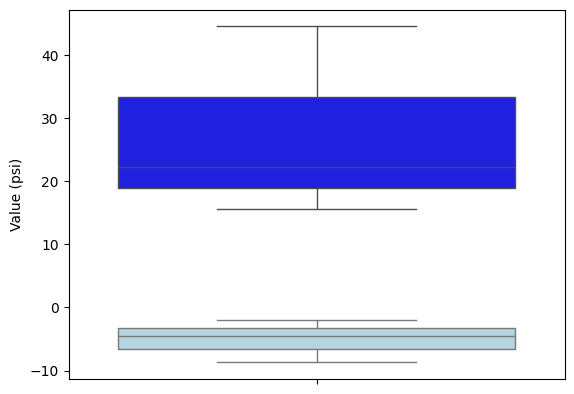

In [220]:
mask_grt_100 = df_40_50['mpgInstant'] > 100
mpg_grt_100_40_50 = mask_grt_100.sum()
mask_lte_100 = df_40_50['mpgInstant']  <= 100
mpg_lte_100_40_50 = mask_lte_100.sum()

mph_40_50_boost_mean =df_40_50['Boost (psi)'].mean().round(2) 
mph_40_50_boost_quantiles=df_40_50['Boost (psi)'].quantile([0.25,0.50,0.75])
df_40_50_boost_quantiles = pd.DataFrame(mph_40_50_boost_quantiles)
df_40_50_boost_quantiles = df_40_50_boost_quantiles.reset_index()
df_40_50_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_40_50_count=len(df_40_50)
mpg_40_50_mpg_mean=df_40_50['mpgInstant'].mean().round(2)
mpg_40_50_100_quantiles=df_40_50['mpgInstant'].quantile([0.25,0.50,0.75])
mpg_40_50_100_per=((mpg_grt_100_40_50/mpg_40_50_count)*100).round(2)
df_40_50_100_quantiles = pd.DataFrame(mpg_40_50_100_quantiles)
df_40_50_100_quantiles = df_40_50_100_quantiles.reset_index()
df_40_50_100_quantiles.columns = ['Percentile', '40-50mph (mpg)']

print("40-50mph")
print(f"Average Boost: {mph_40_50_boost_mean}")
print(f"Value Counts: {mpg_40_50_count}")
print(f"Values > 100mpg: {mpg_grt_100_40_50}")
print(f"Values <= 100mpg: {mpg_lte_100_40_50}")
print(f"Percent above 100mpg: {mpg_40_50_100_per}%")
print(f"Mean MPG: {mpg_40_50_mpg_mean}")
print("mpg Quartiles")
print(df_40_50_100_quantiles)
print("Boost Quartiles")
print(df_40_50_boost_quantiles)
sns.boxplot(y=df_40_50_boost_quantiles['Value (psi)'], color='lightblue')
sns.boxplot(y=df_40_50_100_quantiles['40-50mph (mpg)'], color='blue')

50-60mph
Average Boost: -4.95
Value Counts: 880
Values > 100mpg: 214
Values <= 100mpg: 666
Percent above 100mpg: 24.32%
Mean MPG: 53.73
mpg Quartiles
   Percentile  50-60mph (mpg)
0        0.25          18.100
1        0.50          36.500
2        0.75          96.925
Boost Quartiles
   Percentile  Value (psi)
0        0.25      -10.925
1        0.50       -5.900
2        0.75       -0.400


<Axes: ylabel='Value (psi)'>

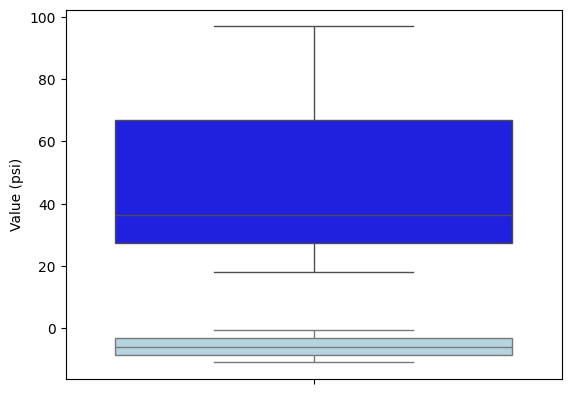

In [221]:
mask_grt_100 = df_50_60['mpgInstant'] > 100
mpg_grt_100_50_60 = mask_grt_100.sum()
mask_lte_100 = df_50_60['mpgInstant']  <= 100
mpg_lte_100_50_60 = mask_lte_100.sum()

mph_50_60_boost_mean =df_50_60['Boost (psi)'].mean().round(2) 
mph_50_60_boost_quantiles=df_50_60['Boost (psi)'].quantile([0.25,0.50,0.75])
df_50_60_boost_quantiles = pd.DataFrame(mph_50_60_boost_quantiles)
df_50_60_boost_quantiles = df_50_60_boost_quantiles.reset_index()
df_50_60_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_50_60_count=len(df_50_60)
mpg_50_60_mpg_mean=df_50_60['mpgInstant'].mean().round(2)
mpg_50_60_100_quantiles=df_50_60['mpgInstant'].quantile([0.25,0.50,0.75])
mpg_50_60_100_per=((mpg_grt_100_50_60/mpg_50_60_count)*100).round(2)
df_50_60_100_quantiles = pd.DataFrame(mpg_50_60_100_quantiles)
df_50_60_100_quantiles = df_50_60_100_quantiles.reset_index()
df_50_60_100_quantiles.columns = ['Percentile', '50-60mph (mpg)']

print("50-60mph")
print(f"Average Boost: {mph_50_60_boost_mean}")
print(f"Value Counts: {mpg_50_60_count}")
print(f"Values > 100mpg: {mpg_grt_100_50_60}")
print(f"Values <= 100mpg: {mpg_lte_100_50_60}")
print(f"Percent above 100mpg: {mpg_50_60_100_per}%")
print(f"Mean MPG: {mpg_50_60_mpg_mean}")
print("mpg Quartiles")
print(df_50_60_100_quantiles)
print("Boost Quartiles")
print(df_50_60_boost_quantiles)
sns.boxplot(y=df_50_60_boost_quantiles['Value (psi)'], color='lightblue')
sns.boxplot(y=df_50_60_100_quantiles['50-60mph (mpg)'], color='blue')

60-70mph
Average Boost: -4.57
Value Counts: 16369
Values > 100mpg: 2141
Values <= 100mpg: 14228
Percent above 100mpg: 13.08%
Mean MPG: 48.44
mpg Quartiles
   Percentile  60-70mph (mpg)
0        0.25            21.7
1        0.50            36.0
2        0.75            67.2
Boost Quartiles
   Percentile  Value (psi)
0        0.25         -8.7
1        0.50         -4.9
2        0.75         -1.0


<Axes: ylabel='Value (psi)'>

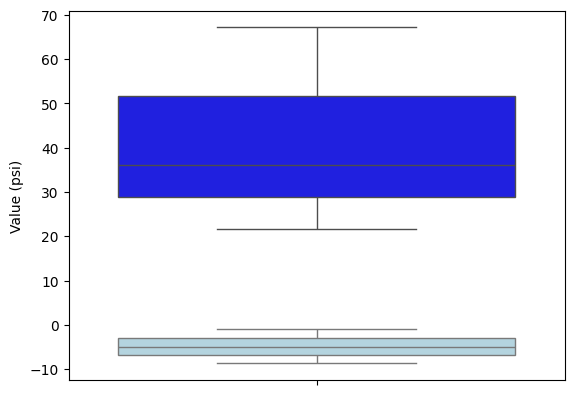

In [222]:
mask_grt_100 = df_60_70['mpgInstant'] > 100
mpg_grt_100_60_70 = mask_grt_100.sum()
mask_lte_100 = df_60_70['mpgInstant']  <= 100
mpg_lte_100_60_70 = mask_lte_100.sum()

mph_60_70_boost_mean =df_60_70['Boost (psi)'].mean().round(2) 
mph_60_70_boost_quantiles=df_60_70['Boost (psi)'].quantile([0.25,0.50,0.75])
df_60_70_boost_quantiles = pd.DataFrame(mph_60_70_boost_quantiles)
df_60_70_boost_quantiles = df_60_70_boost_quantiles.reset_index()
df_60_70_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_60_70_count=len(df_60_70)
mpg_60_70_mpg_mean=df_60_70['mpgInstant'].mean().round(2)
mpg_60_70_100_quantiles=df_60_70['mpgInstant'].quantile([0.25,0.50,0.75])
mpg_60_70_100_per=((mpg_grt_100_60_70/mpg_60_70_count)*100).round(2)
df_60_70_100_quantiles = pd.DataFrame(mpg_60_70_100_quantiles)
df_60_70_100_quantiles = df_60_70_100_quantiles.reset_index()
df_60_70_100_quantiles.columns = ['Percentile', '60-70mph (mpg)']

print("60-70mph")
print(f"Average Boost: {mph_60_70_boost_mean}")
print(f"Value Counts: {mpg_60_70_count}")
print(f"Values > 100mpg: {mpg_grt_100_60_70}")
print(f"Values <= 100mpg: {mpg_lte_100_60_70}")
print(f"Percent above 100mpg: {mpg_60_70_100_per}%")
print(f"Mean MPG: {mpg_60_70_mpg_mean}")
print("mpg Quartiles")
print(df_60_70_100_quantiles)
print("Boost Quartiles")
print(df_60_70_boost_quantiles)
sns.boxplot(y=df_60_70_boost_quantiles['Value (psi)'], color='lightblue')
sns.boxplot(y=df_60_70_100_quantiles['60-70mph (mpg)'], color='blue')

In [1]:
mpg_count_list=[mpg_40_50_count, mpg_50_60_count, mpg_60_70_count, mpg_grt_70_count]
mpg_lte_100_count_list = [int(mpg_lte_100_40_50), int(mpg_lte_100_50_60), int(mpg_lte_100_60_70), int(mpg_lte_100_grt_70)]
mpg_grt_100_count_list = [int(mpg_grt_100_40_50), int(mpg_grt_100_50_60), int(mpg_grt_100_60_70), int(mpg_grt_100_grt_70)]
mpg_grt_100_per_list=[int(mpg_40_50_100_per),int(mpg_50_60_100_per),int(mpg_60_70_100_per),int(mpg_grt_70_100_per)]

mpg_100_df = pd.DataFrame({
    'total mpg counts': mpg_count_list,
    'total mpg <= 100 counts': mpg_lte_100_count_list,
    'total mpg > 100 counts': mpg_grt_100_count_list,
    '% > 100mpg':mpg_grt_100_per_list
}, index=['40-50mph', '50-60mph', '60-70mph', '>70mph'])

print(f'total mpg counts: {mpg_count_list}')
print(f'total mpg <= 100 counts: {mpg_lte_100_count_list}')
print(f'total mpg > 100 counts: {mpg_grt_100_count_list}')
print(f'% > 100mpg : {mpg_grt_100_per_list}')
mpg_100_df.head()

NameError: name 'mpg_40_50_count' is not defined

In [ ]:
# Merge DataFrames on 'Percentile'
df_quartiles = pd.merge(df_40_50_100_quantiles, df_50_60_100_quantiles, on='Percentile')
df_quartiles = pd.merge(df_quartiles, df_60_70_100_quantiles, on='Percentile')
df_quartiles = pd.merge(df_quartiles, df_grt_70_100_quantiles, on='Percentile')
df_quartiles.head()
print(df_quartiles)

df_long = pd.melt(df_quartiles, id_vars='Percentile', var_name='DataFrame', value_name='Value (mpg)')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=df_long, x='Percentile', y='Value (mpg)', hue='DataFrame')
plt.title('Bar Chart of MPG Values by Percentile')
plt.xlabel('Percentile')
plt.ylabel('Value (mpg)')
plt.legend(title='DataFrames')
mpg_by_mph_file_path = os.path.join(output_folder_path, 'mpg_by_mph.jpeg')
plt.savefig(mpg_by_mph_file_path, format='jpeg', dpi=300)
plt.show()

In [782]:

#convert 
df_less_10_geo=df_less_10.copy()
#df_less_10_geo.head()
#
df_10_20_geo = df_10_20.copy()
#df_10_20_geo.head()
#
df_20_30_geo = df_20_30.copy()
#df_20_30_geo.head()
#
df_30_40_geo = df_30_40.copy()
#df_30_40_geo.head()
#
df_40_50_geo = df_40_50.copy()
#df_40_50_geo.head()
#
df_50_60_geo = df_50_60.copy()
#
#
df_60_70_geo = df_60_70.copy()

df_55_75_geo = df_55_75.copy()





In [ ]:
print("Available colormaps:")
for name in dir(cm):
    if 'colormap' in name.lower():
        print(name)

In [ ]:
mask_grt_100 = df_grt_70['mpgInstant'] > 100
mpg_grt_100_grt_70 = mask_grt_100.sum()
mask_lte_100 = df_grt_70['mpgInstant']  <= 100
mpg_lte_100_grt_70 = mask_lte_100.sum()

mph_grt_70_boost_mean =df_grt_70['Boost (psi)'].mean().round(2) 
mph_grt_70_boost_quantiles=df_grt_70['Boost (psi)'].quantile([0.25,0.50,0.75])
df_grt_70_boost_quantiles = pd.DataFrame(mph_grt_70_boost_quantiles)
df_grt_70_boost_quantiles = df_grt_70_boost_quantiles.reset_index()
df_grt_70_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_grt_70_count=len(df_grt_70)
mpg_grt_70_mpg_mean=df_grt_70['mpgInstant'].mean().round(2)
mpg_grt_70_100_quantiles=df_grt_70['mpgInstant'].quantile([0.25,0.50,0.75])
mpg_grt_70_100_per=((mpg_grt_100_grt_70/mpg_grt_70_count)*100).round(2)
df_grt_70_100_quantiles = pd.DataFrame(mpg_grt_70_100_quantiles)
df_grt_70_100_quantiles = df_grt_70_100_quantiles.reset_index()
df_grt_70_100_quantiles.columns = ['Percentile', 'Greater than 70mph (mpg)']

print("Greater Than 70mph")
print(f"Average Boost: {mph_grt_70_boost_mean}")
print(f"Value Counts: {mpg_grt_70_count}")
print(f"Values > 100mpg: {mpg_grt_100_grt_70}")
print(f"Values <= 100mpg: {mpg_lte_100_grt_70}")
print(f"Percent above 100mpg: {mpg_grt_70_100_per}%")
print(f"Mean MPG: {mpg_grt_70_mpg_mean}")
print("mpg Quartiles")
print(df_grt_70_100_quantiles)
print("Boost Quartiles")
print(df_grt_70_boost_quantiles)
sns.boxplot(y=df_grt_70_100_quantiles['Greater than 70mph (mpg)'], color='lightblue')

In [785]:
df_map=df_moving.copy()
map_center = [44.980164, -93.185692]
m = folium.Map(location=map_center, zoom_start=11)
coordinates = df_map[['lat', 'long', 'MPH']].values.tolist()
sorted_coordinates = sorted(coordinates, key=lambda x: x[2])
colormap = cm.LinearColormap(
    colors=['blue', 'green', 'yellow', 'red'],  # Custom color range
    vmin=df_map['MPH'].min(),
    vmax=df_map['MPH'].max(),
    caption='MPH'   
)

colormap.add_to(m)



for i in range(len(df_map) - 1):
    # Coordinates of the current segment
    start = [df_map.iloc[i]['lat'], df_map.iloc[i]['long']]
    end = [df_map.iloc[i + 1]['lat'], df_map.iloc[i + 1]['long']]
    
    # Value for color mapping (use average or a specific value)
    segment_value = (df_map.iloc[i]['MPH'] + df_map.iloc[i + 1]['MPH']) / 2
    
    # Create and add a PolyLine for each segment
    folium.PolyLine(
        locations=[start, end],
        color=colormap(segment_value),  # Map value to color
        weight=5,
        opacity=1
        ).add_to(m)

# Save the map to an HTML file
map_moving_file_path = os.path.join(output_folder_path, 'map_moving.html')
m.save(map_moving_file_path)


In [786]:
#map_center = [44.980164, -93.185692]
#m = folium.Map(location=map_center, zoom_start=11)
#
#
## Prepare the list of coordinates for the PolyLine
#coordinates = df_55_75_geo[['latitude', 'longitude']].values.tolist()
#
## Add a PolyLine to the map
#folium.PolyLine(
#    locations=coordinates,
#    popup=[str(row['Time (sec)']) for idx, row in df_55_75_geo.iterrows()],
#    weight=5,
#    opacity=1,
#    color='blue'
#).add_to(m)

# Save the map to an HTML file
m.save('mpg_55_75_map.html')

In [ ]:
hvexplorer = df.hvplot.explorer()
hvexplorer

In [ ]:
df.columns

In [43]:

#df_moving['Boost (psi)'] = df_moving['Boost (psi)'].replace(0, np.nan)
#df_moving['inManAbsPress (inHg)'] = df_moving['inManAbsPress (inHg)'].replace(0, np.nan)
#
## Calculate new columns
#df_moving['massAirFlowRate/Boost'] = df_moving['massAirFlowRate (lb/min)'] / df_moving['Boost (psi)']
#df_moving['massAirFlowRate/manPress'] = df_moving['massAirFlowRate (lb/min)'] / df_moving['inManAbsPress (inHg)']
#df_moving.head()
